# **LOAD AND EXPLORE DATA**


![texto alternativo](https://imagescdn.dealercarsearch.com/dealerimages/12089/21721/cars-1.jpg)

### **INITIAL WORKING ENVIRONMENT SET UP**

In [0]:
# Utils
import math

# Data manipulation
import numpy as np
import pandas as pd

### **READ DATA**


In [0]:
#data = pd.read_csv('Auto.csv')
data = pd.read_csv('https://raw.githubusercontent.com/AzIz000/machine-learning/master/datasets/Auto.csv')
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,16.0,8,400.0,230,4278,9.5,73,1,pontiac grand prix
1,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina
2,14.0,8,455.0,225,3086,10.0,70,1,buick estate wagon (sw)
3,12.0,8,455.0,225,4951,11.0,73,1,buick electra 225 custom
4,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala


### **EXPLORE METADATA**


**Analize data set:**

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int64  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   year          392 non-null    int64  
 7   origin        392 non-null    int64  
 8   name          392 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 27.7+ KB


In [0]:
data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


### **EXPLORE DATA**

In [0]:
# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Plot data:**

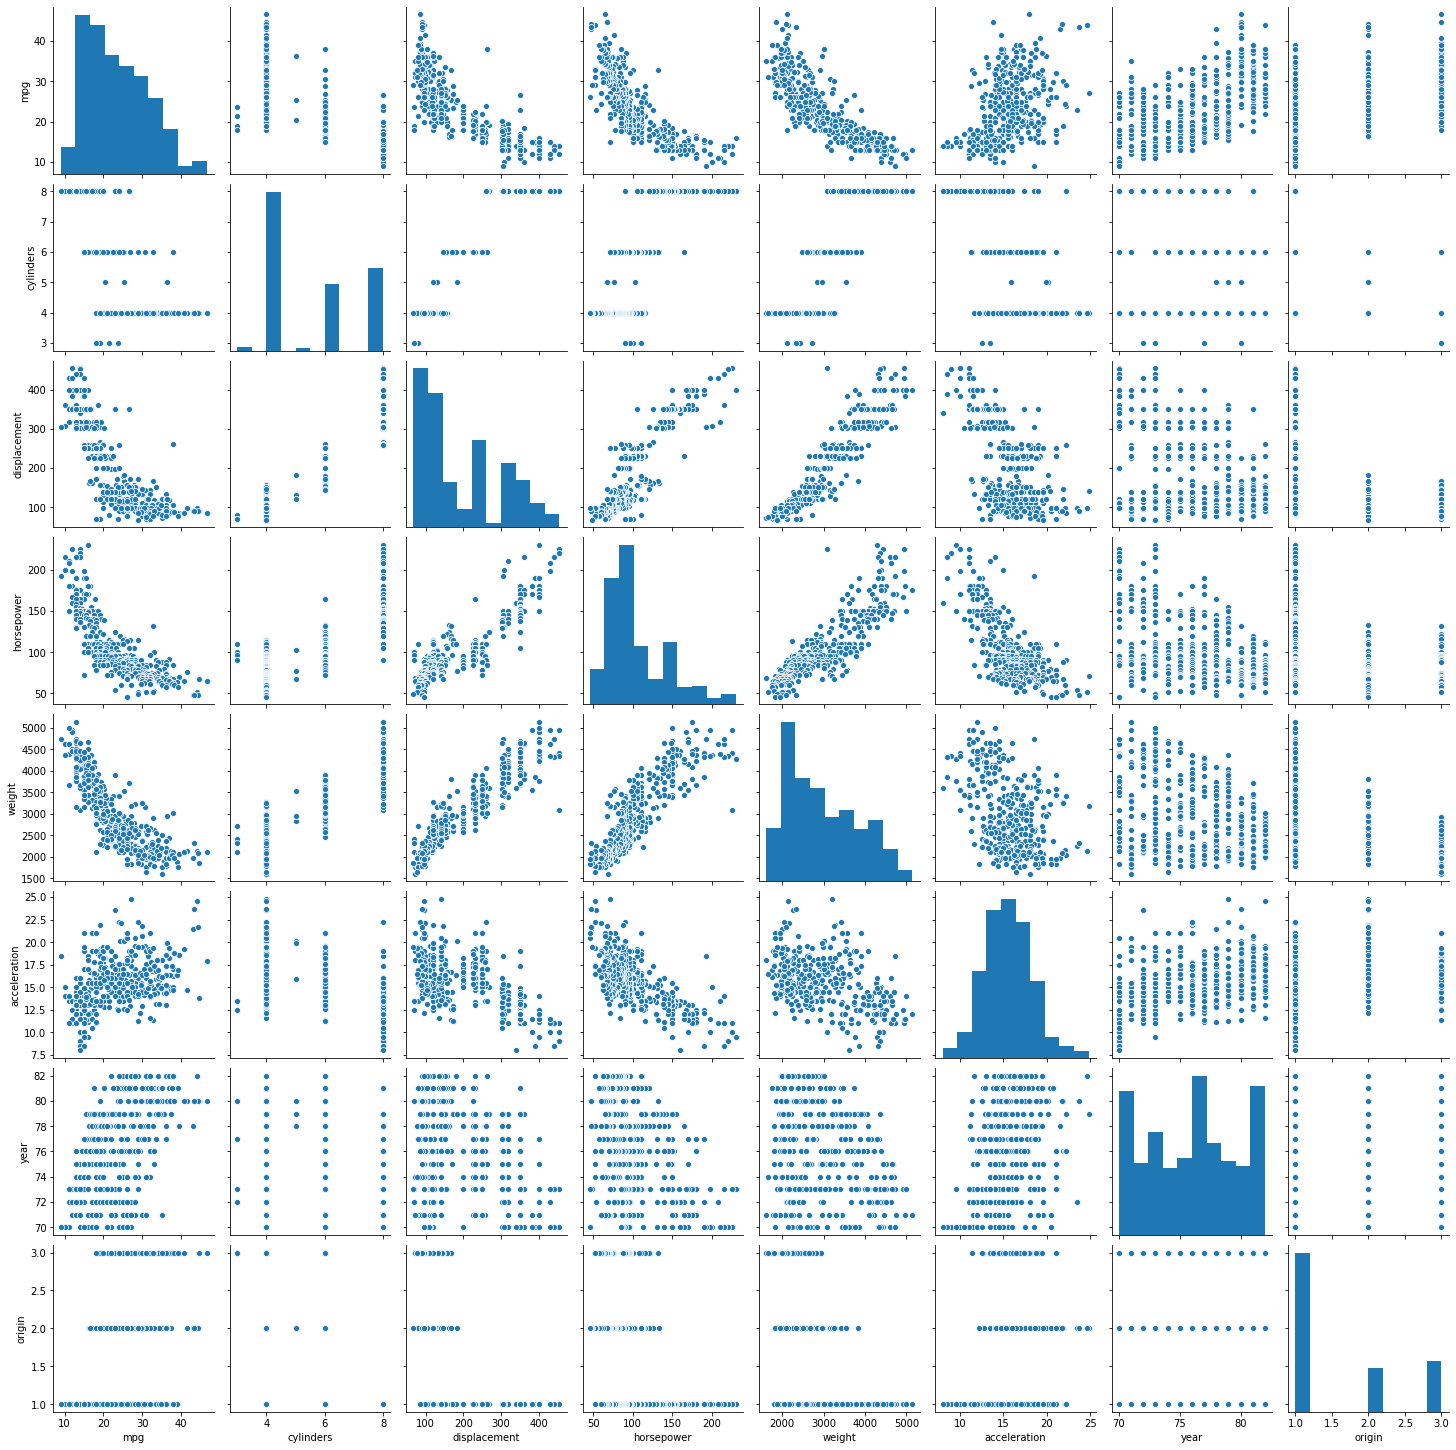

In [0]:
sns.pairplot(data)

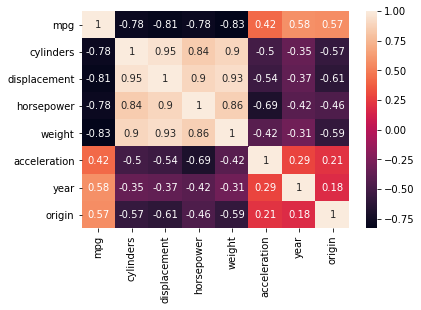

In [0]:
sns.heatmap(data.corr(),annot=True)

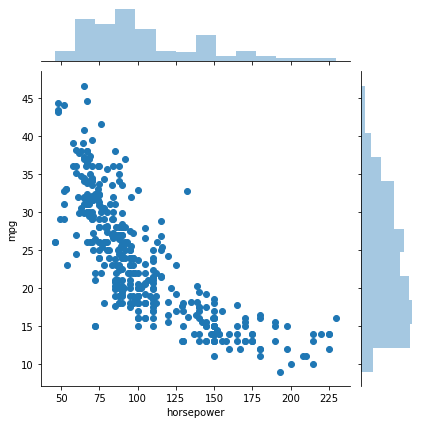

In [0]:
sns.jointplot(data=data,y='mpg',x='horsepower')

# **MODEL DATA**

## **LINEAR REGRESSION**

### **ESTIMATING THE COEFFICIENTS**

**Let's do it ourselves:**

In [0]:
#First, create our Linear Regression Class
class OrdinaryLeastSquares():
  #Constructor
  def __init__(self):
    self.coefficients = []

  #Model fit
  def fit(self,X,y):
    X = self._concatenate_ones(X)
    self.coefficients = np.linalg.inv(X.transpose().dot(X)).dot(X.transpose()).dot(y) # beta = (Xt*X)^-1*Xt*y
  
  #Predict
  def predict(self,entry):
    entry = self._concatenate_ones(entry)
    return entry.dot(self.coefficients)

  #Aux methods
  def _concatenate_ones(self,X):
    ones = np.ones(shape=X.shape[0]).reshape(-1,1)
    return np.concatenate((ones,X),1)

Calculated coefficients: 
 [[39.93586102]
 [-0.15784473]]


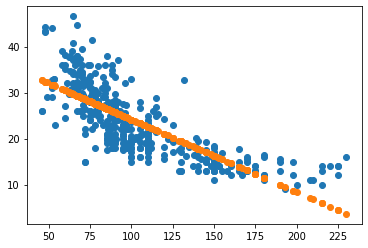

In [0]:
#Second, try it on our dataset
X = data[['horsepower']]
y = data[['mpg']]
ols = OrdinaryLeastSquares()
ols.fit(X,y)
print('Calculated coefficients: \n', ols.coefficients)
predictions = ols.predict(X)
plt.scatter(X,y)
plt.scatter(X,predictions)

**Now, let's use SciKit-Learn and compare:**

In [0]:
#First, import Linear Regression model
from sklearn.linear_model import LinearRegression

Calculated intercept: 
 [39.93586102]
Calculated coefficients: 
 [[-0.15784473]]


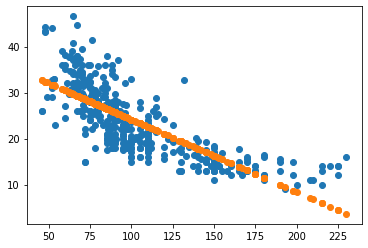

In [0]:
#Second, try it on our dataset
model = LinearRegression()
model.fit(X,y)
print('Calculated intercept: \n', model.intercept_)
print('Calculated coefficients: \n', model.coef_)
predictions = model.predict(X)
plt.scatter(X,y)
plt.scatter(X,predictions)

**EXERCISE**: Modify our custom class so that we also serve our coefficients and intercept exactly as SciKit-Learn does.


In [0]:
#First, create our Linear Regression Class
class OrdinaryLeastSquares2():
  #Constructor
  def __init__(self):
    self.intercept_ = 0
    self.coef_ = []

  #Model fit
  def fit(self,X,y):
    X = self._concatenate_ones(X)
    coefficients = np.linalg.inv(X.transpose().dot(X)).dot(X.transpose()).dot(y) # beta = (Xt*X)^-1*Xt*y
    self.intercept_ = coefficients[0,0]
    self.coef_ = np.delete(coefficients,0,0)
  
  #Predict
  def predict(self,entry):
    entry = self._concatenate_ones(entry)
    coefficients = np.insert(self.coef_, 0, self.intercept_, 0)
    return entry.dot(coefficients)

  #Aux methods
  def _concatenate_ones(self,X):
    ones = np.ones(shape=X.shape[0]).reshape(-1,1)
    return np.concatenate((ones,X),1)

In [0]:
# Test
ols2 = OrdinaryLeastSquares2()
ols2.fit(X,y)
print('Your intercept: \n', ols2.intercept_)
print('Your coefficients: \n', ols2.coef_)
model = LinearRegression()
model.fit(X,y)
print('Real intercept: \n', model.intercept_)
print('Real coefficients: \n', model.coef_)

Your intercept: 
 39.935861021170496
Your coefficients: 
 [[-0.15784473]]
Real intercept: 
 [39.93586102]
Real coefficients: 
 [[-0.15784473]]


**EXERCISE**: Build a new algorithm called **Gradient Descent** that uses gradient descent algorithm to create a linear regressionl model for this same data set

In [0]:
#Home work

### **ASSESSING THE ACCURACY OF THE COEFFICIENT ESTIMATES**

**Calculate t-statistic and p-value for coefficients:**

In [0]:
import statsmodels.api as sm
Xsm = sm.add_constant(X)
model = sm.OLS(y, Xsm)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Sun, 17 May 2020   Prob (F-statistic):           7.03e-81
Time:                        07:34:42   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.9359      0.717     55.660      0.0

### **ASSESSING THE ACCURACY OF THE MODEL**

#### **RESIDUAL STANDARD ERROR (RSE)**

**Let's first plot the errors:**

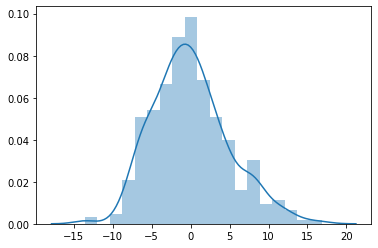

In [0]:
#Create and fit model
ols2 = OrdinaryLeastSquares2()
ols2.fit(X,y)

#Predict
predictions = ols2.predict(X)

#Plot errors
y_res = y - predictions
sns.distplot(y_res)

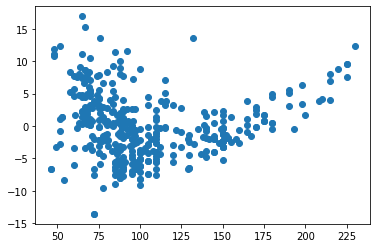

In [0]:
plt.scatter(X,y_res)

**Now, calculate RSE:**

In [0]:
#Calculate RSE:
n = y.shape[0]
rse = math.sqrt(1/(n-2) * ((y-predictions)**2).sum())
print('RSE: ', rse)

RSE:  4.90575691954594


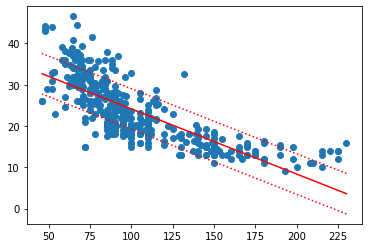

In [0]:
#Plot deviation
y_rse_up = predictions + rse
y_rse_down = predictions - rse
plt.scatter(X, y)
plt.plot(X, predictions, '-r')
plt.plot(X,y_rse_up, ':r')
plt.plot(X,y_rse_down, ':r')

#### **R2**

**EXERCISE**: Modify our custom class and implement a method to calculate **R2** score using **score(X,y)** interface

In [0]:
#First, create our Linear Regression Class
class OrdinaryLeastSquares3():
  #Constructor
  def __init__(self):
    self.intercept_ = 0
    self.coef_ = []

  #Model fit
  def fit(self,X,y):
    X = self._concatenate_ones(X)
    coefficients = np.linalg.inv(X.transpose().dot(X)).dot(X.transpose()).dot(y) # beta = (Xt*X)^-1*Xt*y
    self.intercept_ = coefficients[0,0]
    self.coef_ = np.delete(coefficients,0,0)
  
  #Predict
  def predict(self,entry):
    entry = self._concatenate_ones(entry)
    coefficients = np.insert(self.coef_, 0, self.intercept_, 0)
    return entry.dot(coefficients)

  #R2 score
  def score(self,X,y):
    predictions = self.predict(X)
    rss = ((y - predictions)**2).sum()
    tss = ((y - y.mean())**2).sum()
    return 1-rss/tss

  #Aux methods
  def _concatenate_ones(self,X):
    ones = np.ones(shape=X.shape[0]).reshape(-1,1)
    return np.concatenate((ones,X),1)

In [0]:
#Test
ols3 = OrdinaryLeastSquares3()
ols3.fit(X,y)
print('Your R2 score: ', ols3.score(X,y))

model = LinearRegression()
model.fit(X,y)
print('Real R2 score: ', model.score(X,y))

Your R2 score:  mpg    0.605948
dtype: float64
Real R2 score:  0.6059482578894348


#### **MSE**

**EXERCISE**: Modify our custom class and implement a method to calculate **MSE** score using **mse(X,y)** interface

In [0]:
#First, create our Linear Regression Class
class OrdinaryLeastSquares4():


In [0]:
#Test
ols4 = OrdinaryLeastSquares4()
ols4.fit(X,y)
print('Your MSE: ', ols4.mse(X,y))

from sklearn import metrics
model = LinearRegression()
model.fit(X,y)
print('Real MSE: ', metrics.mean_squared_error(y,model.predict(X)))

Your MSE:  mpg    23.943663
dtype: float64
Real MSE:  23.943662938603108


**

## **POLYNOMIAL REGRESSION**

### **ESTIMATING THE COEFFICIENTS**

**Try polynomials up to degree 3:**

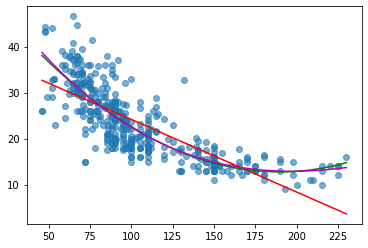

In [0]:
#Calculate higher degree new independent variables
data['horsepower2'] = data['horsepower']**2
data['horsepower3'] = data['horsepower']**3

X1 = data[['horsepower']]
X2 = data[['horsepower','horsepower2']]
X3 = data[['horsepower','horsepower2','horsepower3']]

#Create and fit models
linear = LinearRegression()
poly2 = LinearRegression()
poly3 = LinearRegression()

linear.fit(X1,y)
poly2.fit(X2,y)
poly3.fit(X3,y)

#Predict and plot
l_predictions = linear.predict(X1)
p2_predictions = poly2.predict(X2)
p3_predictions = poly3.predict(X3)

plt.scatter(X1,y,alpha=0.6)
plt.plot(X1,l_predictions,'-r')
plt.plot(X1,p2_predictions,'-g')
plt.plot(X1,p3_predictions,'-m')

**Now take advantage of SciKit-Learn utilities:**

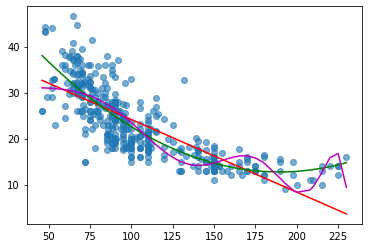

In [0]:
from sklearn.preprocessing import PolynomialFeatures
#Preprocess
X = data[['horsepower']]
poly = PolynomialFeatures(degree = 12) 
X12 = poly.fit_transform(X)

#Create and fit model
poly12 = LinearRegression()  
poly12.fit(X12, y)

#Predict and plot
p12_predictions = poly12.predict(X12)
plt.scatter(X1,y,alpha=0.6)
plt.plot(X1,l_predictions,'-r')
plt.plot(X1,p2_predictions,'-g')
plt.plot(X1,p12_predictions,'-m')

### **ASSESSING THE ACCURACY OF THE MODEL**

#### **R2**

**EXERCISE:** Calculate and compare R2 metric for linear, degree 3 and degree 12 models

In [0]:
print('R2 1: ', linear.score(X1,y))
print('R2 3: ', poly3.score(X3,y))
print('R2 12: ', poly12.score(X12,y))

R2 1:  0.6059482578894348
R2 3:  0.6882136931259099
R2 12:  0.6347718599769856


#### **MSE**

**EXERCISE:** Calculate and compare MSE metric for linear, degree 3 and degree 12 models

MSE 1:  23.943662938603108
MSE 3:  18.94498981448592
MSE 12:  22.192261943991877


# **MODEL ASSESMENT**

## **VALIDATION SET**

### **SINGLE SPLIT**

**OBJECTIVE**:

We will split data in two sets, one for training and one for testing, and analize how testing MSE fluctuates for linear regression models with different flexibility.

In [0]:
from sklearn import metrics
#Configuration parameters
fraction = 0.5 #fraction of data dedicated to training
degrees = 11 # degrees up to of regression polynomial

In [0]:
# Random sample for model training
train = data.sample(frac=fraction, random_state=100)
test = data.drop(train.index)
X_train = train[['horsepower']]
y_train =  train[['mpg']]
X_test = test[['horsepower']]
y_test =  test[['mpg']]

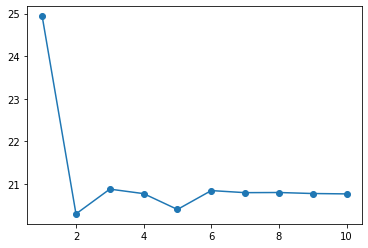

In [0]:
#For each model to asses (each degree of the polynomial) train, test and calculate MSE metric
mse_vset = list() #mse list order by polynomial degree

# For each degree
for d in range(1,degrees):
  # Train model
  model = LinearRegression() 
  poly = PolynomialFeatures(degree = d)
  model.fit(poly.fit_transform(X_train), y_train)
  # Predict
  predictions = model.predict(poly.fit_transform(X_test))
  # Calculate MSE
  mse_vset.append(metrics.mean_squared_error(y_test,predictions))

# Plot results
results_vset_1 = pd.DataFrame()
results_vset_1['degree'] = range(1,11)
results_vset_1['MSE'] = mse_vset
plt.plot(results_vset_1['degree'],results_vset_1['MSE'])
plt.scatter(results_vset_1['degree'],results_vset_1['MSE'])

### **MULTIPLE SPLITS**

**OBJECTIVE**:

Repeat validation set several times on different samples and observe how MSE for different degree polynomials fluctuates.

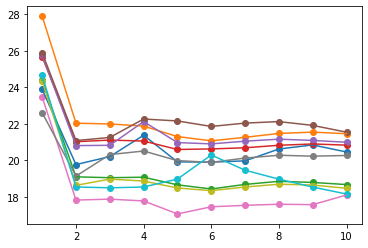

In [0]:
# Repeat process 10 times with different random samples and compare
from sklearn.model_selection import train_test_split
# Configuration
fraction = 0.5 # fraction of data dedicated to training
degrees = 11 # degrees
iterations = 10 # cv iterations

# Each iteration
for i in range(0,iterations):
  #Sample data
  X_train, X_test, y_train, y_test = train_test_split(data[['horsepower']], data[['mpg']], test_size=fraction)
  mse_vset_1 = list()
  
  # For each degree
  for d in range(1,degrees):
    # Train model
    model = LinearRegression() 
    poly = PolynomialFeatures(degree = d) 
    X_train_poly = poly.fit_transform(X_train) 
    model.fit(X_train_poly, y_train)
    # Predict
    predictions = model.predict(poly.fit_transform(X_test))
    # Calculate MSE
    mse_vset_1.append(metrics.mean_squared_error(y_test,predictions))
  
  # Plot results
  results_vset_1 = pd.DataFrame()
  results_vset_1['degree'] = range(1,11)
  results_vset_1['MSE'] = mse_vset_1
  plt.plot(results_vset_1['degree'],results_vset_1['MSE'])
  plt.scatter(results_vset_1['degree'],results_vset_1['MSE'])



##**CROSS-VALIDATION**



### **SINGLE CROSS-VALIDATION**

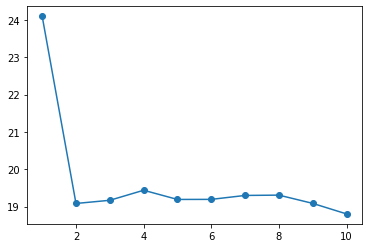

In [0]:
## Configuration
folds = 10 # fold number
degrees = 11 # degrees

data_to_sample = data.copy() #items not yet folded
items_per_fold = math.ceil(len(data.index) / folds)
mse_cv_folded = list()
# For each fold
for k in range(0,folds):
  # Select data to fold
  if k == folds-1: # last fold
    sample = data_to_sample 
  else:  
    sample = data_to_sample.sample(n=items_per_fold) # create new fold    
    data_to_sample = data_to_sample.drop(sample.index) # drop fold used in this iteration
  X_train = data.drop(sample.index)[['horsepower']]
  X_test = sample[['horsepower']]
  y_train = data.drop(sample.index)[['mpg']]
  y_test = sample[['mpg']]

  mse_fold = list()
  # For each degree
  for d in range(1,degrees):
    # Train model
    model = LinearRegression() 
    poly = PolynomialFeatures(degree = d)
    model.fit(poly.fit_transform(X_train), y_train)
    # Predict
    predictions = model.predict(poly.fit_transform(X_test))
    # Calculate MSE
    mse_fold.append(metrics.mean_squared_error(y_test,predictions))
  mse_cv_folded.append(mse_fold)

#Aggregate and plot metric results
mse_cv = list()
for d in zip(*mse_cv_folded):
  mse_cv.append(np.array(d).mean())

metrics_cv = pd.DataFrame()
metrics_cv['degree'] = range(1,11)
metrics_cv['MSE'] = mse_cv
plt.plot(metrics_cv['degree'],metrics_cv['MSE'])
plt.scatter(metrics_cv['degree'],metrics_cv['MSE'])

**EXERCISE:** Repeat previous taks but know use SciKit Learn own cross validation implementation in order to calculate different degree polynomial MSE.

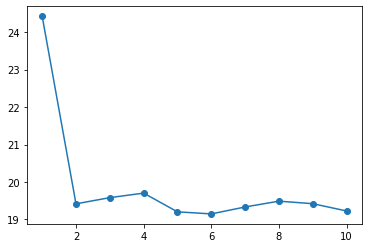

In [0]:
#Clue: take a look at sklearn.model_selection.cross_validate and sklearn.model_selection.KFold


### **MULTIPLE CROSS-VALIDATION**

**EXERCISE:** Repeat previous taks but know compare several 10-fold cross validation iterations.

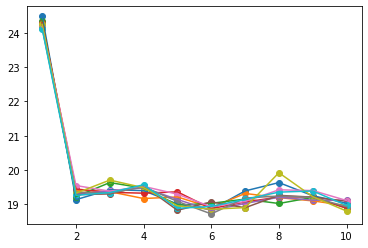

# **REFERENCES**

[1] [Multiple Linear Regression from Scratch in Numpy](https://towardsdatascience.com/multiple-linear-regression-from-scratch-in-numpy-36a3e8ac8014)